In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(295,315)]
i =0
result = np.zeros((240))

In [3]:
for yy in years:
    for mm in months:

        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[0,224:343,900:1000]
        #plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
salt = np.zeros((240))
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        plotvar = plotvar[0,224:343,900:1000]
        #plotvar = plotvar[0,224:343,1100:1200]
        #plotvar[plotvar == -1000.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=0)
        salt[i] = aveplot
        
        i = i + 1
#********************************************************************

In [5]:
TTT = result[8:236].reshape(19,12)
SSS = salt[8:236].reshape(19,12)
#np.savetxt('SST.out', temp)
#np.savetxt('SSS.out', salt)

In [6]:
T = np.arange(-2,6.5,0.1)
S = np.arange(33.3,35.0,0.05)
dens = np.zeros([85,35])

In [ ]:
import seawater as gsw
# Loop to fill in grid with densities
for j in range(0,85):
    for i in range(0, 35):
        dens[j,i]=gsw.dens0(S[i],T[j])-1000

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


Text(0.5, 1.0, 'T-S Diagrams (From model year 471-489, 20$^\\circ$W-10$^\\circ$W)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


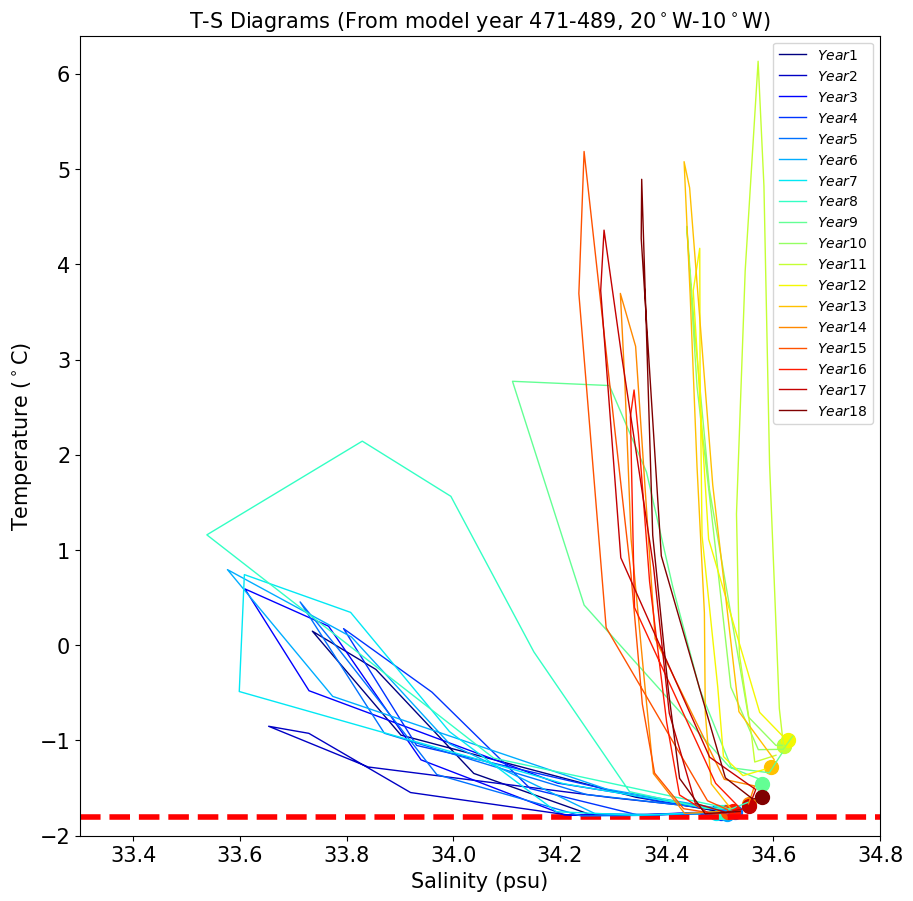

In [7]:
my_font = {'fontname':'Cambria', 'size':'15'}
# Plot data ***********************************************
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.contour(S,T,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.3f') # Label every second level
plt.hlines(-1.8,33.3, 34.8, colors = "red",linestyles = "dashed",linewidth=4)
Time = np.arange(0,14,1)

number = 18
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i, color in enumerate(colors, start=1):
    ax1.plot(SSS[i,:],TTT[i,:], color=color,linewidth=1, label='$Year {i} $'.format(i=i))
    ax1.legend()

for i, color in enumerate(colors, start=1):
    ax1.scatter(SSS[i,0],TTT[i,0], color=color,s=100 )


plt.xlim(33.3, 34.8)
plt.yticks(**my_font)
plt.xticks(**my_font)
ax1.set_xlabel('Salinity (psu)', **my_font)
ax1.set_ylabel('Temperature ($^\circ$C)', **my_font)
ax1.set_title('T-S Diagrams (From model year 471-489, 20$^\circ$W-10$^\circ$W)',**my_font)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


Text(0.5, 1.0, 'T-S Diagrams (From model year 471-489, 20$^\\circ$W-10$^\\circ$W)')

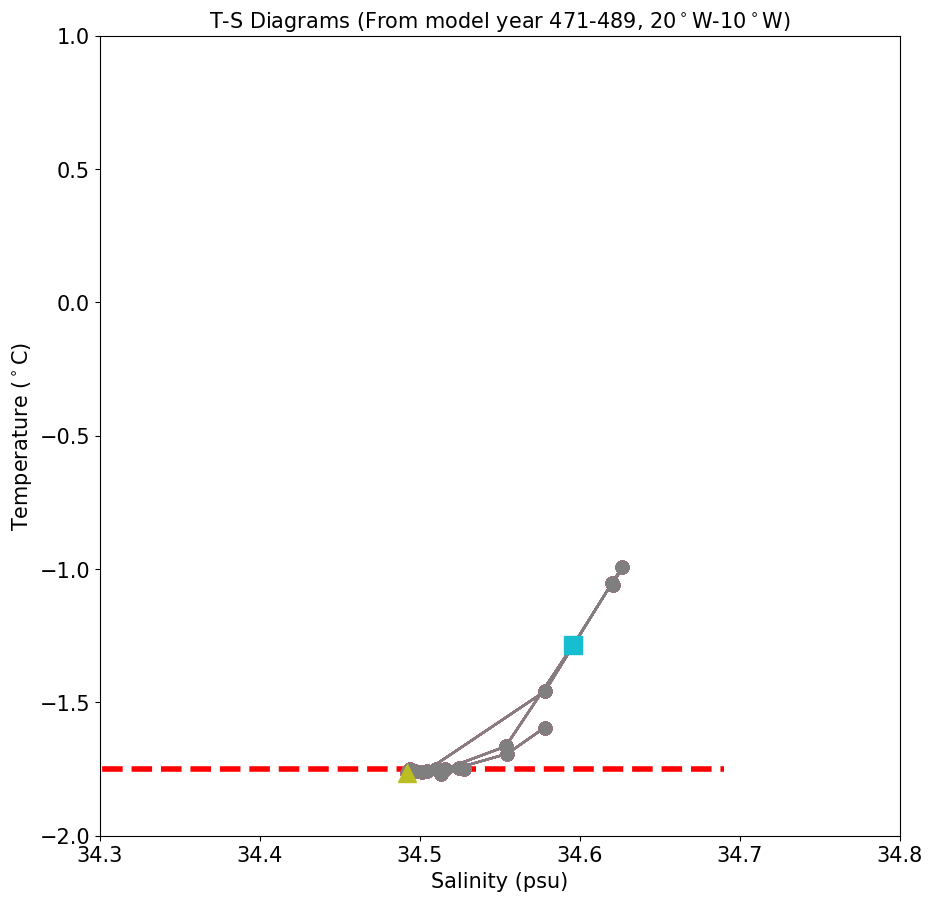

In [8]:
my_font = {'fontname':'Cambria', 'size':'15'}
# Plot data ***********************************************
fig = plt.figure(figsize=(10, 10), dpi=100)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
CS = plt.contour(S,T,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.3f') # Label every second level

plt.hlines(-1.75,33.51, 34.69, colors = "red",linestyles = "dashed",linewidth=4)
Time = np.arange(0,14,1)

number = 18
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, number)]


for i, color in enumerate(colors, start=1):
    ax1.plot(SSS[:,0],TTT[:,0], marker='o',markersize=9)
    #ax1.legend()
ax1.plot(SSS[0,0],TTT[0,0], marker='^',markersize=13)
ax1.plot(SSS[13,0],TTT[13,0], marker='s',markersize=13)
plt.xlim(34.3, 34.8)

plt.ylim(-2, 1)
plt.yticks(**my_font)
plt.xticks(**my_font)
ax1.set_xlabel('Salinity (psu)', **my_font)
ax1.set_ylabel('Temperature ($^\circ$C)', **my_font)
ax1.set_title('T-S Diagrams (From model year 471-489, 20$^\circ$W-10$^\circ$W)',**my_font)